teen_phone_addiction_dataset

Introduction

This dataset provides a comprehensive look into the smartphone usage habits of teenagers, with a particular emphasis on understanding how digital behavior influences key aspects of their lives. It captures variables related to addiction levels, academic performance, and time distribution across activities such as social media, gaming, and educational use. Additionally, it includes proxies for mental and physical health, such as sleep duration, anxiety levels, and screen time before bed. By analyzing these interconnected factors, the healthier dataset enables researchers, educators, psychologists, and data scientists to explore behavioral trends and build predictive models—whether to classify addiction risk, forecast academic outcomes, or design interventions that promote digital habits among teens.


Import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


Import dataset

In [2]:
df=pd.read_csv(r"D:\Data_science\datasets\\teen_phone_addiction_dataset.csv")

Display the first 5 rows of the dataset

In [3]:
print(df.head())

   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Anxiety_Level  \
0                4.0          6.1                    78             10   
1                5.5          6.5                    70              3   
2                5.8          5.5                    93              2   
3                3.1          3.9                    78              9   
4                2.5          6.7                    56              1   

  Phone_Usage_Purpose  Family_Communication  Screen_Time_Before_Bed  \
0            Browsing                     4        

Display the last 5 rows of the dataset

In [4]:
print(df.tail())

        ID                Name  Age Gender          Location School_Grade  \
999   1000     Andrea Martinez   16   Male     North Jeffery         11th   
1000  1001      David Williams   17   Male  North Nathanland         10th   
1001  1002        Kevin Peters   19   Male     Kelleychester         10th   
1002  1003  Patricia Robertson   15   Male  Port Robertville          8th   
1003  1004         John Thomas   19  Other      New Luisfort         12th   

      Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Anxiety_Level  \
999                 6.7          8.2                    93              8   
1000                5.5          5.7                    98              9   
1001                6.3          4.7                    52              4   
1002                4.4          9.7                    71              9   
1003                4.0          5.8                    84              1   

     Phone_Usage_Purpose  Family_Communication  Screen_Time_Before_Bed  \


Data cleaning

In [5]:
# Check whether there are any missing values
print(df.isna().sum())

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Anxiety_Level             0
Phone_Usage_Purpose       0
Family_Communication      0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64


Data Understanding

In [6]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1004 non-null   int64  
 1   Name                    1004 non-null   object 
 2   Age                     1004 non-null   int64  
 3   Gender                  1004 non-null   object 
 4   Location                1004 non-null   object 
 5   School_Grade            1004 non-null   object 
 6   Daily_Usage_Hours       1004 non-null   float64
 7   Sleep_Hours             1004 non-null   float64
 8   Academic_Performance    1004 non-null   int64  
 9   Anxiety_Level           1004 non-null   int64  
 10  Phone_Usage_Purpose     1004 non-null   object 
 11  Family_Communication    1004 non-null   int64  
 12  Screen_Time_Before_Bed  1004 non-null   float64
 13  Phone_Checks_Per_Day    1004 non-null   int64  
 14  Weekend_Usage_Hours     1004 non-null   

Use summary statistics to understand distributions.

In [7]:
print(df.describe())

                ID          Age  Daily_Usage_Hours  Sleep_Hours  \
count  1004.000000  1004.000000        1004.000000  1004.000000   
mean    502.500000    16.069721           5.060458     6.465737   
std     289.974137     1.990786           1.933960     1.498561   
min       1.000000    13.000000           0.000000     3.000000   
25%     251.750000    14.000000           3.800000     5.400000   
50%     502.500000    16.000000           4.900000     6.500000   
75%     753.250000    18.000000           6.400000     7.500000   
max    1004.000000    19.000000          11.000000    10.000000   

       Academic_Performance  Anxiety_Level  Family_Communication  \
count           1004.000000    1004.000000           1004.000000   
mean              75.526892       5.507968              5.512948   
std               14.496408       2.878555              2.818687   
min               50.000000       1.000000              1.000000   
25%               63.000000       3.000000              

 1.What are the unique Phone_Usage_Purpose values in the dataset, and how many records are associated with each purpose?

In [8]:
print(df['Phone_Usage_Purpose'].value_counts())

Education       206
Browsing        205
Social Media    205
Other           200
Gaming          188
Name: Phone_Usage_Purpose, dtype: int64


2. What is the average sleep duration among students?

In [9]:
avg_sleep = np.mean(df['Sleep_Hours'])
print(f"Average Sleep Hours: {avg_sleep:.2f}")

Average Sleep Hours: 6.47


3.Which school grade has the highest average addiction level?

In [10]:
df.groupby('School_Grade')['Addiction_Level'].mean().sort_values(ascending=False)

School_Grade
7th     9.203974
11th    9.044828
10th    8.886286
8th     8.851497
12th    8.835185
9th     8.776571
Name: Addiction_Level, dtype: float64

4. Is there a correlation between anxiety level and academic performance?

In [11]:
correlation = df['Anxiety_Level'].corr(df['Academic_Performance'])
print(f"Correlation between Anxiety and Academic Performance: {correlation:.2f}")

Correlation between Anxiety and Academic Performance: 0.02


5. Compare average weekend usage between genders

In [12]:
df.groupby('Gender')['Weekend_Usage_Hours'].mean()

Gender
Female    5.898165
Male      5.942319
Other     5.968675
Name: Weekend_Usage_Hours, dtype: float64

6.Which location has the lowest average sleep hours?

In [13]:
df.groupby('Location')['Sleep_Hours'].mean().sort_values()

Location
Donnaside          3.0
New Jaimemouth     3.0
Michelleside       3.0
Candicechester     3.0
Hollyton           3.0
                  ... 
Markfurt          10.0
Robertsside       10.0
Stephentown       10.0
South Peter       10.0
Drakeland         10.0
Name: Sleep_Hours, Length: 962, dtype: float64

7. How many students have above-average addiction levels?

In [14]:
mean_addiction = np.mean(df['Addiction_Level'])
above_avg = np.sum(df['Addiction_Level'] > mean_addiction)
print(f"Students with above-average addiction: {above_avg}")

Students with above-average addiction: 660


8.How does the phone usage vary across students?

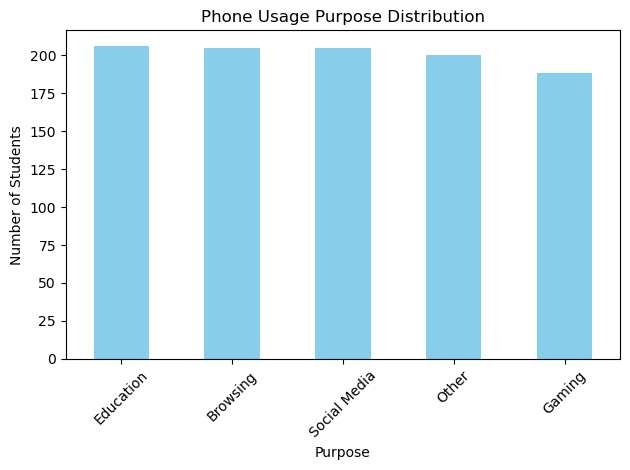

In [15]:
import matplotlib.pyplot as plt
df['Phone_Usage_Purpose'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phone Usage Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


9. What is the standard deviation of daily phone usage hours

In [16]:
std_usage = np.std(df['Daily_Usage_Hours'])
print(f"Standard Deviation of Daily Usage: {std_usage:.2f}")

Standard Deviation of Daily Usage: 1.93


10. What is the distribution of screen time before bed?

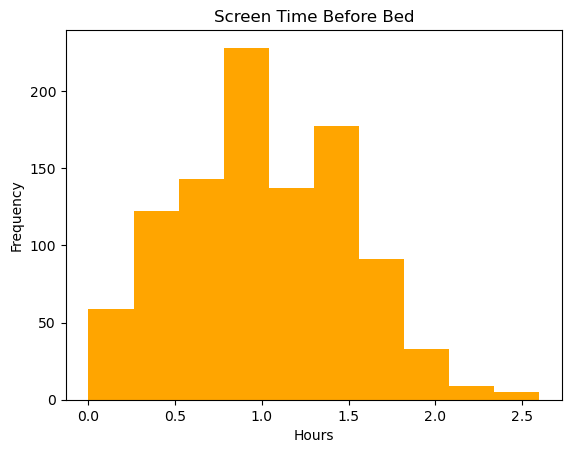

In [17]:
plt.hist(df['Screen_Time_Before_Bed'], bins=10, color='orange')
plt.title('Screen Time Before Bed')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()


11. Compare average academic performance across genders

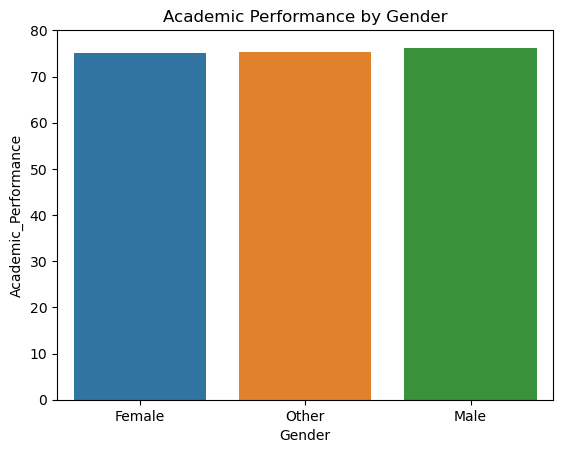

In [18]:
sns.barplot(x='Gender', y='Academic_Performance', data=df, ci=None)
plt.title('Academic Performance by Gender')
plt.show()

12. Does Screen Time Before Bed impact Academic Performance?

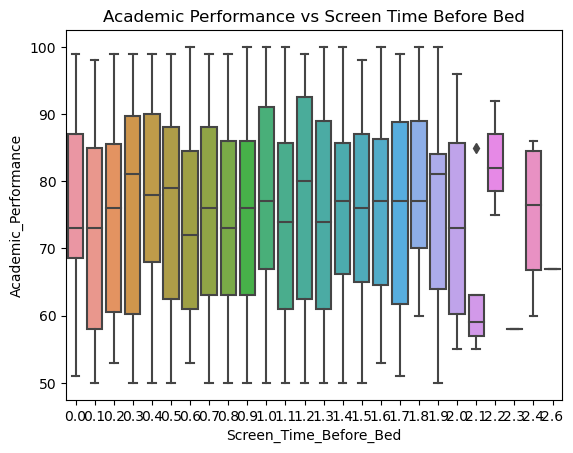

In [19]:
sns.boxplot(x="Screen_Time_Before_Bed", y="Academic_Performance", data=df)
plt.title("Academic Performance vs Screen Time Before Bed")
plt.show()

13.Is there a trend between Family Communication and Academic Performance?

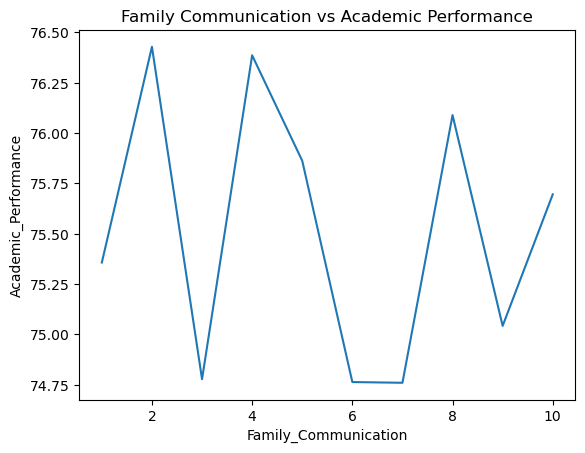

In [20]:
sns.lineplot(x="Family_Communication", y="Academic_Performance", data=df, ci=None)
plt.title("Family Communication vs Academic Performance")
plt.show()


14. Can we cluster students into groups (e.g., High Anxiety – Low Sleep vs Balanced)?

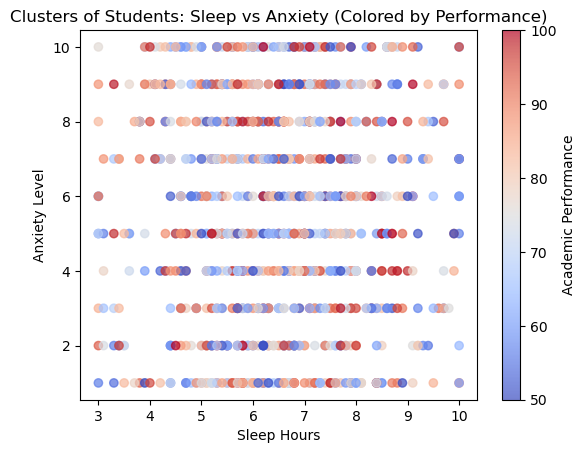

In [21]:
plt.scatter(df["Sleep_Hours"], df["Anxiety_Level"], 
            c=df["Academic_Performance"], cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Academic Performance")
plt.title("Clusters of Students: Sleep vs Anxiety (Colored by Performance)")
plt.xlabel("Sleep Hours")
plt.ylabel("Anxiety Level")
plt.show()
